In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('../assignment 3/data/q2_dataset.csv')

In [3]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91


In [4]:
data.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21
1258,07/09/15,$120.07,78291510,123.85,124.06,119.22


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
list(data.columns)

['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']

In [7]:
data.columns = data.columns.str.strip()
list(data.columns)

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [8]:
data['target']= data['Open']
data['Date'] =pd.to_datetime(data.Date)
data=data.sort_values(by='Date')
data.head()

,Date,Close/Last,Volume,Open,High,Low,target
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72


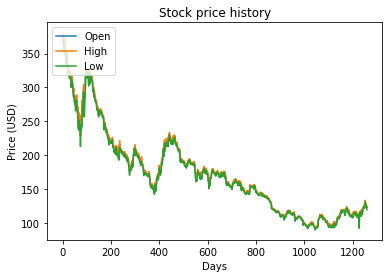

In [9]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
#plt.plot(data["Close"])
plt.title('Stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low'], loc='upper left')
plt.show()

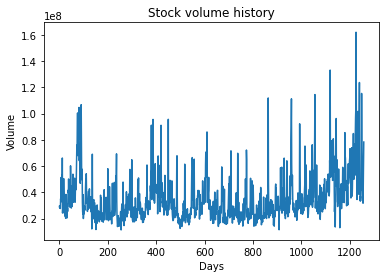

In [10]:
plt.figure()
plt.plot(data["Volume"])
plt.title('Stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [11]:
#create features using columns from previous 3 days
data['Volume_t-3'] = data.shift(3)['Volume']
data['Volume_t-2'] = data.shift(2)['Volume']
data['Volume_t-1'] = data.shift(1)['Volume']
data['Open_t-3'] = data.shift(3)['Open']
data['Open_t-2'] = data.shift(2)['Open']
data['Open_t-1'] = data.shift(1)['Open']
data['High_t-3'] = data.shift(3)['High']
data['High_t-2'] = data.shift(2)['High']
data['High_t-1'] = data.shift(1)['High']
data['Low_t-3'] = data.shift(3)['Low']
data['Low_t-2'] = data.shift(2)['Low']
data['Low_t-1'] = data.shift(1)['Low']
data['target']= data['Open']
data.head()

,Date,Close/Last,Volume,Open,High,Low,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [12]:
data = data.drop(['Close/Last','Volume','Open','High','Low'], axis = 1)
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1258,2015-07-09,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,2015-07-10,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
1256,2015-07-13,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [13]:
data.isna().sum()

Date          0
target        0
Volume_t-3    3
Volume_t-2    2
Volume_t-1    1
Open_t-3      3
Open_t-2      2
Open_t-1      1
High_t-3      3
High_t-2      2
High_t-1      1
Low_t-3       3
Low_t-2       2
Low_t-1       1
dtype: int64

In [14]:
#drop columns with null values
data = data.dropna()
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
1255,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1254,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04
1253,2015-07-16,127.74,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58
1252,2015-07-17,129.08,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35
1251,2015-07-20,130.97,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31


In [15]:
#shuffle/randomize the data
#data = data.sample(frac = 1).reset_index(drop=True)
#data.head()

In [16]:
list(data.columns)

['Date',
 'target',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1']

In [17]:
data = data[[
 'Date',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1', 
 'target']]
data.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
1255,2015-07-14,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32,126.04
1254,2015-07-15,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,125.72
1253,2015-07-16,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,127.74
1252,2015-07-17,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,129.08
1251,2015-07-20,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,130.97


In [18]:
len(data)

1256

In [19]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
train, test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('train_data_RNN.csv',index=False)
test.to_csv('test_data_RNN.csv',index=False)


In [20]:
type(train)

pandas.core.frame.DataFrame

In [21]:
train.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
566,2018-04-09,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20,169.88
121,2020-01-14,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15,316.70
354,2019-02-11,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42,171.05
676,2017-10-27,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78,159.29
888,2016-12-23,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64,115.59


In [22]:
"""#sklearn alternative for Apple Silicon
def split_train_valid_test(data,test_ratio):
    test_set_size= int(len(data)*test_ratio)
    return data[test_set_size:], data[:test_set_size]

train,test = split_train_valid_test(data,test_ratio=0.3)
train.to_csv('train_data_RNN.csv',index=True)
test.to_csv('test_data_RNN.csv',index=True)
print(len(train),len(test))"""


"#sklearn alternative for Apple Silicon\ndef split_train_valid_test(data,test_ratio):\n    test_set_size= int(len(data)*test_ratio)\n    return data[test_set_size:], data[:test_set_size]\n\ntrain,test = split_train_valid_test(data,test_ratio=0.3)\ntrain.to_csv('train_data_RNN.csv',index=True)\ntest.to_csv('test_data_RNN.csv',index=True)\nprint(len(train),len(test))"

In [23]:
data_train = pd.read_csv('train_data_RNN.csv')
data_test = pd.read_csv('test_data_RNN.csv')

### Preprocessing

The range of the data is widely varied. The values of Volume are very high and could skew the model. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. 

### try standart scaler as well

In [24]:
#separate features and target
X_train = data_train.drop(['Date','target'], axis = 1)
y_train = data_train['target']
X_test_date = data_test
#X_test_date['Date'] =pd.to_datetime(X_test_date.Date)
#X_test_date=X_test_date.sort_values(by='Date')
X_test = data_test.drop(['Date','target'], axis = 1)
y_test = data_test['target']
#y_test = y_test.reindex(X_test_date.index)


In [25]:
X_train


,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20
1,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15
2,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42
3,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78
4,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64
...,...,...,...,...,...,...,...,...,...,...,...,...
874,20182050.0,20670830.0,15955820.0,189.69,191.78,190.68,192.55,192.43,191.96,189.69,190.17,189.56
875,36487930.0,38016810.0,52954070.0,211.15,216.88,219.05,215.18,220.45,222.36,209.27,216.62,216.81
876,28803760.0,33511990.0,36486560.0,303.22,305.64,308.10,305.17,310.35,317.05,301.97,304.29,307.24
877,35907770.0,25402270.0,21983410.0,151.78,153.80,153.89,153.92,154.72,154.28,151.69,153.54,152.70


In [26]:
X_test

,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70
1,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62
2,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37
3,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77
4,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12
...,...,...,...,...,...,...,...,...,...,...,...,...
372,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80
373,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74
374,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33
375,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43


In [27]:
y_train

0      169.88
1      316.70
2      171.05
3      159.29
4      115.59
        ...  
874    192.45
875    209.55
876    317.83
877    153.21
878    167.88
Name: target, Length: 879, dtype: float64

In [28]:
y_test

0      132.85
1      144.49
2      116.44
3      191.81
4      108.91
        ...  
372    112.02
373    205.53
374    148.82
375    273.61
376    284.82
Name: target, Length: 377, dtype: float64

In [29]:
X_test_date

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
0,2015-07-21,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,132.85
1,2017-06-28,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62,144.49
2,2015-09-25,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37,116.44
3,2019-06-10,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77,191.81
4,2016-04-08,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12,108.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2015-12-17,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80,112.02
373,2019-08-02,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74,205.53
374,2017-07-17,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33,148.82
375,2020-04-22,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43,273.61


In [30]:
#create validation set
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=0)


In [31]:
#X_val

In [32]:
#scale the data 
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
#X_val=scaler.fit_transform(X_val)
X_test=scaler.transform(X_test)

In [33]:
#saving the scaler to apply it on the test dataset
import pickle
with open('scaler_RNN_model','wb') as file_pick:
    pickle.dump(scaler,file_pick)

In [34]:
#numpy array conversion
X_train=np.array(X_train)
#X_val = np.array(X_val)
X_test=np.array(X_test)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
#X_val =X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
X_train.shape[0],X_train.shape[1]


(879, 12)

In [37]:
#X_val.shape[0],X_val.shape[1]


In [38]:
X_test.shape[0],X_test.shape[1]


(377, 12)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Using TensorFlow backend.


In [41]:
model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])
#add dropout

In [42]:
'''
    'mean_squared_error' has been used as loss function
    Optimizer: Here adam optimizer has been used. Adam is an adaptive
    learning rate optimization algorithm that’s been designed specifically for
    training deep neural networks.
    Accuracy is not used as a metric because this is a regression model.
'''
model.compile(loss='mean_squared_error',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 12, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [44]:
%%time
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2000,batch_size=64,verbose=1)


Epoch 1/2000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-07-13 00:53:35.596502: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-07-13 00:53:35.596648: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


12/14 [========================>.....] - ETA: 0s - loss: 34159.6030WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x28b61e040> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
14/14 [==============================] - 1s 28ms/step - loss: 33933.6387 - val_loss: 34716.4453
Epoch 2/2000
14/14 [==============================] - 0s 

14/14 [==============================] - 0s 7ms/step - loss: 17871.7012 - val_loss: 19176.7344
Epoch 68/2000
14/14 [==============================] - 0s 7ms/step - loss: 17744.2130 - val_loss: 18896.0605
Epoch 69/2000
14/14 [==============================] - 0s 7ms/step - loss: 17198.0522 - val_loss: 18883.7246
Epoch 70/2000
14/14 [==============================] - 0s 7ms/step - loss: 17309.6350 - val_loss: 18594.7148
Epoch 71/2000
14/14 [==============================] - 0s 7ms/step - loss: 16638.0449 - val_loss: 18494.0195
Epoch 72/2000
14/14 [==============================] - 0s 7ms/step - loss: 16708.8794 - val_loss: 18316.2891
Epoch 73/2000
14/14 [==============================] - 0s 8ms/step - loss: 17157.3840 - val_loss: 18213.7383
Epoch 74/2000
14/14 [==============================] - 0s 7ms/step - loss: 16749.0995 - val_loss: 17970.2285
Epoch 75/2000
14/14 [==============================] - 0s 7ms/step - loss: 16632.6215 - val_loss: 17890.0684
Epoch 76/2000
14/14 [============

Epoch 142/2000
14/14 [==============================] - 0s 7ms/step - loss: 9921.4930 - val_loss: 10637.1172
Epoch 143/2000
14/14 [==============================] - 0s 7ms/step - loss: 9319.0047 - val_loss: 10436.5156
Epoch 144/2000
14/14 [==============================] - 0s 7ms/step - loss: 9671.5251 - val_loss: 10542.3174
Epoch 145/2000
14/14 [==============================] - 0s 7ms/step - loss: 9389.8485 - val_loss: 10469.6543
Epoch 146/2000
14/14 [==============================] - 0s 7ms/step - loss: 9403.6019 - val_loss: 10294.0469
Epoch 147/2000
14/14 [==============================] - 0s 7ms/step - loss: 9195.0893 - val_loss: 10109.5820
Epoch 148/2000
14/14 [==============================] - 0s 7ms/step - loss: 9513.5439 - val_loss: 10168.5840
Epoch 149/2000
14/14 [==============================] - 0s 7ms/step - loss: 9936.7221 - val_loss: 10060.9717
Epoch 150/2000
14/14 [==============================] - 0s 7ms/step - loss: 9770.2954 - val_loss: 9925.9141
Epoch 151/2000
14/14

Epoch 218/2000
14/14 [==============================] - 0s 7ms/step - loss: 6284.1998 - val_loss: 6201.3643
Epoch 219/2000
14/14 [==============================] - 0s 7ms/step - loss: 6041.5290 - val_loss: 6292.5571
Epoch 220/2000
14/14 [==============================] - 0s 7ms/step - loss: 6161.4362 - val_loss: 6084.9277
Epoch 221/2000
14/14 [==============================] - 0s 7ms/step - loss: 5992.7420 - val_loss: 6223.2705
Epoch 222/2000
14/14 [==============================] - 0s 7ms/step - loss: 5904.3434 - val_loss: 6086.8276
Epoch 223/2000
14/14 [==============================] - 0s 7ms/step - loss: 5340.8840 - val_loss: 6001.6597
Epoch 224/2000
14/14 [==============================] - 0s 7ms/step - loss: 6033.2499 - val_loss: 5976.5562
Epoch 225/2000
14/14 [==============================] - 0s 7ms/step - loss: 6130.8058 - val_loss: 6174.5532
Epoch 226/2000
14/14 [==============================] - 0s 7ms/step - loss: 5088.7946 - val_loss: 5899.4517
Epoch 227/2000
14/14 [======

Epoch 294/2000
14/14 [==============================] - 0s 7ms/step - loss: 4118.3209 - val_loss: 4446.0708
Epoch 295/2000
14/14 [==============================] - 0s 7ms/step - loss: 4021.6490 - val_loss: 4455.9414
Epoch 296/2000
14/14 [==============================] - 0s 7ms/step - loss: 4269.2164 - val_loss: 4442.7969
Epoch 297/2000
14/14 [==============================] - 0s 7ms/step - loss: 4264.3960 - val_loss: 4429.5264
Epoch 298/2000
14/14 [==============================] - 0s 7ms/step - loss: 4251.3696 - val_loss: 4343.2578
Epoch 299/2000
14/14 [==============================] - 0s 7ms/step - loss: 4349.6192 - val_loss: 4426.7417
Epoch 300/2000
14/14 [==============================] - 0s 7ms/step - loss: 4052.4584 - val_loss: 4373.7939
Epoch 301/2000
14/14 [==============================] - 0s 7ms/step - loss: 4431.8967 - val_loss: 4361.4263
Epoch 302/2000
14/14 [==============================] - 0s 7ms/step - loss: 4658.3541 - val_loss: 4375.4209
Epoch 303/2000
14/14 [======

Epoch 370/2000
14/14 [==============================] - 0s 7ms/step - loss: 4340.6507 - val_loss: 3946.7275
Epoch 371/2000
14/14 [==============================] - 0s 7ms/step - loss: 4130.6702 - val_loss: 3951.2632
Epoch 372/2000
14/14 [==============================] - 0s 7ms/step - loss: 4432.5789 - val_loss: 3971.3389
Epoch 373/2000
14/14 [==============================] - 0s 7ms/step - loss: 4311.5422 - val_loss: 4008.8806
Epoch 374/2000
14/14 [==============================] - 0s 7ms/step - loss: 4045.5589 - val_loss: 3922.0046
Epoch 375/2000
14/14 [==============================] - 0s 7ms/step - loss: 4069.9111 - val_loss: 3953.2917
Epoch 376/2000
14/14 [==============================] - 0s 7ms/step - loss: 4339.6370 - val_loss: 3970.1526
Epoch 377/2000
14/14 [==============================] - 0s 7ms/step - loss: 4316.3058 - val_loss: 3979.3257
Epoch 378/2000
14/14 [==============================] - 0s 7ms/step - loss: 4064.4639 - val_loss: 3926.9294
Epoch 379/2000
14/14 [======

Epoch 446/2000
14/14 [==============================] - 0s 8ms/step - loss: 3946.4115 - val_loss: 3830.0879
Epoch 447/2000
14/14 [==============================] - 0s 7ms/step - loss: 4076.7639 - val_loss: 3873.3203
Epoch 448/2000
14/14 [==============================] - 0s 7ms/step - loss: 4353.8267 - val_loss: 3899.6008
Epoch 449/2000
14/14 [==============================] - 0s 8ms/step - loss: 4445.9476 - val_loss: 3861.5881
Epoch 450/2000
14/14 [==============================] - 0s 7ms/step - loss: 3917.8732 - val_loss: 3871.9919
Epoch 451/2000
14/14 [==============================] - 0s 7ms/step - loss: 4208.0676 - val_loss: 3840.2036
Epoch 452/2000
14/14 [==============================] - 0s 7ms/step - loss: 3945.3172 - val_loss: 3925.1047
Epoch 453/2000
14/14 [==============================] - 0s 7ms/step - loss: 4087.3055 - val_loss: 3879.5027
Epoch 454/2000
14/14 [==============================] - 0s 7ms/step - loss: 3994.8529 - val_loss: 3853.1035
Epoch 455/2000
14/14 [======

Epoch 522/2000
14/14 [==============================] - 0s 7ms/step - loss: 3931.6686 - val_loss: 3928.0281
Epoch 523/2000
14/14 [==============================] - 0s 7ms/step - loss: 4118.8810 - val_loss: 3863.5002
Epoch 524/2000
14/14 [==============================] - 0s 7ms/step - loss: 3748.1609 - val_loss: 3894.9749
Epoch 525/2000
14/14 [==============================] - 0s 7ms/step - loss: 4174.4924 - val_loss: 3888.3435
Epoch 526/2000
14/14 [==============================] - 0s 7ms/step - loss: 4455.8465 - val_loss: 3865.1716
Epoch 527/2000
14/14 [==============================] - 0s 7ms/step - loss: 4297.9760 - val_loss: 3886.3096
Epoch 528/2000
14/14 [==============================] - 0s 7ms/step - loss: 4081.3138 - val_loss: 3877.3118
Epoch 529/2000
14/14 [==============================] - 0s 7ms/step - loss: 3811.6572 - val_loss: 3903.4170
Epoch 530/2000
14/14 [==============================] - 0s 7ms/step - loss: 3917.7035 - val_loss: 3859.1040
Epoch 531/2000
14/14 [======

Epoch 598/2000
14/14 [==============================] - 0s 7ms/step - loss: 4138.8824 - val_loss: 3913.5381
Epoch 599/2000
14/14 [==============================] - 0s 7ms/step - loss: 4349.8777 - val_loss: 3844.8535
Epoch 600/2000
14/14 [==============================] - 0s 7ms/step - loss: 4277.2070 - val_loss: 3852.7109
Epoch 601/2000
14/14 [==============================] - 0s 7ms/step - loss: 4165.3706 - val_loss: 3864.9661
Epoch 602/2000
14/14 [==============================] - 0s 7ms/step - loss: 4222.1461 - val_loss: 3844.2244
Epoch 603/2000
14/14 [==============================] - 0s 7ms/step - loss: 3938.0286 - val_loss: 3940.4243
Epoch 604/2000
14/14 [==============================] - 0s 7ms/step - loss: 4320.4235 - val_loss: 3907.3223
Epoch 605/2000
14/14 [==============================] - 0s 7ms/step - loss: 4090.5005 - val_loss: 3946.3438
Epoch 606/2000
14/14 [==============================] - 0s 7ms/step - loss: 4167.1775 - val_loss: 3891.7891
Epoch 607/2000
14/14 [======

Epoch 674/2000
14/14 [==============================] - 0s 7ms/step - loss: 1606.3554 - val_loss: 2387.4497
Epoch 675/2000
14/14 [==============================] - 0s 7ms/step - loss: 1508.5160 - val_loss: 2150.7986
Epoch 676/2000
14/14 [==============================] - 0s 7ms/step - loss: 1425.9288 - val_loss: 2377.9016
Epoch 677/2000
14/14 [==============================] - 0s 7ms/step - loss: 1395.0715 - val_loss: 2699.5334
Epoch 678/2000
14/14 [==============================] - 0s 7ms/step - loss: 1411.9070 - val_loss: 2192.2810
Epoch 679/2000
14/14 [==============================] - 0s 7ms/step - loss: 1332.8087 - val_loss: 2274.6477
Epoch 680/2000
14/14 [==============================] - 0s 7ms/step - loss: 1491.8326 - val_loss: 2480.6775
Epoch 681/2000
14/14 [==============================] - 0s 7ms/step - loss: 1484.3095 - val_loss: 2428.9490
Epoch 682/2000
14/14 [==============================] - 0s 7ms/step - loss: 1427.2276 - val_loss: 2763.6548
Epoch 683/2000
14/14 [======

14/14 [==============================] - 0s 7ms/step - loss: 768.0636 - val_loss: 1999.7170
Epoch 751/2000
14/14 [==============================] - 0s 7ms/step - loss: 754.1634 - val_loss: 2162.1306
Epoch 752/2000
14/14 [==============================] - 0s 7ms/step - loss: 794.1219 - val_loss: 1984.4211
Epoch 753/2000
14/14 [==============================] - 0s 7ms/step - loss: 726.2297 - val_loss: 1853.9227
Epoch 754/2000
14/14 [==============================] - 0s 7ms/step - loss: 746.7989 - val_loss: 2306.6169
Epoch 755/2000
14/14 [==============================] - 0s 7ms/step - loss: 685.7170 - val_loss: 2187.2930
Epoch 756/2000
14/14 [==============================] - 0s 7ms/step - loss: 750.7752 - val_loss: 2001.6608
Epoch 757/2000
14/14 [==============================] - 0s 7ms/step - loss: 714.0450 - val_loss: 2399.0569
Epoch 758/2000
14/14 [==============================] - 0s 7ms/step - loss: 803.4390 - val_loss: 2328.1790
Epoch 759/2000
14/14 [==============================

14/14 [==============================] - 0s 7ms/step - loss: 613.7921 - val_loss: 1813.3767
Epoch 827/2000
14/14 [==============================] - 0s 7ms/step - loss: 528.3730 - val_loss: 2613.1675
Epoch 828/2000
14/14 [==============================] - 0s 7ms/step - loss: 629.2534 - val_loss: 2122.7554
Epoch 829/2000
14/14 [==============================] - 0s 7ms/step - loss: 538.0315 - val_loss: 1886.1536
Epoch 830/2000
14/14 [==============================] - 0s 7ms/step - loss: 571.7088 - val_loss: 1882.5802
Epoch 831/2000
14/14 [==============================] - 0s 7ms/step - loss: 602.3616 - val_loss: 1976.1174
Epoch 832/2000
14/14 [==============================] - 0s 7ms/step - loss: 610.7286 - val_loss: 2089.2563
Epoch 833/2000
14/14 [==============================] - 0s 7ms/step - loss: 558.6118 - val_loss: 1983.0258
Epoch 834/2000
14/14 [==============================] - 0s 7ms/step - loss: 606.6382 - val_loss: 2606.0503
Epoch 835/2000
14/14 [==============================

14/14 [==============================] - 0s 7ms/step - loss: 538.6615 - val_loss: 2371.2817
Epoch 903/2000
14/14 [==============================] - 0s 7ms/step - loss: 488.6737 - val_loss: 1565.0999
Epoch 904/2000
14/14 [==============================] - 0s 7ms/step - loss: 479.8441 - val_loss: 1530.8536
Epoch 905/2000
14/14 [==============================] - 0s 7ms/step - loss: 409.8659 - val_loss: 1704.1176
Epoch 906/2000
14/14 [==============================] - 0s 7ms/step - loss: 387.7474 - val_loss: 2022.6931
Epoch 907/2000
14/14 [==============================] - 0s 7ms/step - loss: 445.2936 - val_loss: 1487.7496
Epoch 908/2000
14/14 [==============================] - 0s 7ms/step - loss: 405.3474 - val_loss: 1809.2465
Epoch 909/2000
14/14 [==============================] - 0s 7ms/step - loss: 500.8855 - val_loss: 2094.5295
Epoch 910/2000
14/14 [==============================] - 0s 7ms/step - loss: 502.4378 - val_loss: 2096.9807
Epoch 911/2000
14/14 [==============================

14/14 [==============================] - 0s 7ms/step - loss: 438.2989 - val_loss: 2664.3757
Epoch 979/2000
14/14 [==============================] - 0s 7ms/step - loss: 437.2739 - val_loss: 1942.4939
Epoch 980/2000
14/14 [==============================] - 0s 7ms/step - loss: 428.2495 - val_loss: 2460.2358
Epoch 981/2000
14/14 [==============================] - 0s 7ms/step - loss: 462.6156 - val_loss: 2565.1863
Epoch 982/2000
14/14 [==============================] - 0s 7ms/step - loss: 412.1764 - val_loss: 1429.5779
Epoch 983/2000
14/14 [==============================] - 0s 7ms/step - loss: 466.7508 - val_loss: 1478.3773
Epoch 984/2000
14/14 [==============================] - 0s 7ms/step - loss: 445.5453 - val_loss: 1726.4871
Epoch 985/2000
14/14 [==============================] - 0s 7ms/step - loss: 461.0761 - val_loss: 1606.0613
Epoch 986/2000
14/14 [==============================] - 0s 7ms/step - loss: 425.3982 - val_loss: 1802.8560
Epoch 987/2000
14/14 [==============================

14/14 [==============================] - 0s 7ms/step - loss: 367.0025 - val_loss: 1636.7246
Epoch 1055/2000
14/14 [==============================] - 0s 7ms/step - loss: 385.7620 - val_loss: 1990.7343
Epoch 1056/2000
14/14 [==============================] - 0s 7ms/step - loss: 441.6239 - val_loss: 1832.6013
Epoch 1057/2000
14/14 [==============================] - 0s 7ms/step - loss: 420.8493 - val_loss: 2089.9150
Epoch 1058/2000
14/14 [==============================] - 0s 7ms/step - loss: 408.2424 - val_loss: 1934.3347
Epoch 1059/2000
14/14 [==============================] - 0s 7ms/step - loss: 437.2239 - val_loss: 2138.9646
Epoch 1060/2000
14/14 [==============================] - 0s 7ms/step - loss: 450.6122 - val_loss: 2269.0391
Epoch 1061/2000
14/14 [==============================] - 0s 7ms/step - loss: 382.6053 - val_loss: 1522.2775
Epoch 1062/2000
14/14 [==============================] - 0s 7ms/step - loss: 390.0258 - val_loss: 2064.3887
Epoch 1063/2000
14/14 [=====================

14/14 [==============================] - 0s 7ms/step - loss: 403.0217 - val_loss: 2094.4966
Epoch 1131/2000
14/14 [==============================] - 0s 7ms/step - loss: 395.6581 - val_loss: 2009.4449
Epoch 1132/2000
14/14 [==============================] - 0s 7ms/step - loss: 411.9767 - val_loss: 2703.9202
Epoch 1133/2000
14/14 [==============================] - 0s 7ms/step - loss: 369.1118 - val_loss: 1983.6278
Epoch 1134/2000
14/14 [==============================] - 0s 7ms/step - loss: 395.3524 - val_loss: 1755.7795
Epoch 1135/2000
14/14 [==============================] - 0s 7ms/step - loss: 387.6944 - val_loss: 1875.1128
Epoch 1136/2000
14/14 [==============================] - 0s 8ms/step - loss: 389.9656 - val_loss: 1915.0378
Epoch 1137/2000
14/14 [==============================] - 0s 7ms/step - loss: 478.1340 - val_loss: 1808.6061
Epoch 1138/2000
14/14 [==============================] - 0s 7ms/step - loss: 375.3070 - val_loss: 1669.5204
Epoch 1139/2000
14/14 [=====================

14/14 [==============================] - 0s 8ms/step - loss: 427.9059 - val_loss: 1588.3259
Epoch 1207/2000
14/14 [==============================] - 0s 7ms/step - loss: 390.8853 - val_loss: 1881.4250
Epoch 1208/2000
14/14 [==============================] - 0s 7ms/step - loss: 386.8145 - val_loss: 1947.2972
Epoch 1209/2000
14/14 [==============================] - 0s 7ms/step - loss: 412.2019 - val_loss: 2546.5203
Epoch 1210/2000
14/14 [==============================] - 0s 7ms/step - loss: 371.1540 - val_loss: 1993.6436
Epoch 1211/2000
14/14 [==============================] - 0s 7ms/step - loss: 437.0189 - val_loss: 1993.6722
Epoch 1212/2000
14/14 [==============================] - 0s 7ms/step - loss: 416.3189 - val_loss: 1781.6726
Epoch 1213/2000
14/14 [==============================] - 0s 7ms/step - loss: 404.0214 - val_loss: 1352.7001
Epoch 1214/2000
14/14 [==============================] - 0s 7ms/step - loss: 405.4109 - val_loss: 1661.6240
Epoch 1215/2000
14/14 [=====================

14/14 [==============================] - 0s 7ms/step - loss: 395.9747 - val_loss: 1452.9492
Epoch 1283/2000
14/14 [==============================] - 0s 7ms/step - loss: 366.0235 - val_loss: 2013.8346
Epoch 1284/2000
14/14 [==============================] - 0s 7ms/step - loss: 386.5244 - val_loss: 1678.6353
Epoch 1285/2000
14/14 [==============================] - 0s 7ms/step - loss: 454.9301 - val_loss: 1812.4932
Epoch 1286/2000
14/14 [==============================] - 0s 7ms/step - loss: 378.0410 - val_loss: 2130.7651
Epoch 1287/2000
14/14 [==============================] - 0s 7ms/step - loss: 352.3811 - val_loss: 1581.8755
Epoch 1288/2000
14/14 [==============================] - 0s 7ms/step - loss: 352.6113 - val_loss: 1851.6726
Epoch 1289/2000
14/14 [==============================] - 0s 7ms/step - loss: 393.1100 - val_loss: 1380.1372
Epoch 1290/2000
14/14 [==============================] - 0s 8ms/step - loss: 346.0105 - val_loss: 1753.0698
Epoch 1291/2000
14/14 [=====================

Epoch 1358/2000
14/14 [==============================] - 0s 7ms/step - loss: 387.0981 - val_loss: 2675.6245
Epoch 1359/2000
14/14 [==============================] - 0s 7ms/step - loss: 362.1728 - val_loss: 2083.2002
Epoch 1360/2000
14/14 [==============================] - 0s 7ms/step - loss: 337.7868 - val_loss: 2704.6123
Epoch 1361/2000
14/14 [==============================] - 0s 7ms/step - loss: 401.4699 - val_loss: 2467.9089
Epoch 1362/2000
14/14 [==============================] - 0s 7ms/step - loss: 401.8008 - val_loss: 2975.5435
Epoch 1363/2000
14/14 [==============================] - 0s 7ms/step - loss: 364.3402 - val_loss: 1376.7061
Epoch 1364/2000
14/14 [==============================] - 0s 7ms/step - loss: 365.1912 - val_loss: 1964.8201
Epoch 1365/2000
14/14 [==============================] - 0s 7ms/step - loss: 347.3215 - val_loss: 2524.4443
Epoch 1366/2000
14/14 [==============================] - 0s 7ms/step - loss: 369.1508 - val_loss: 2529.0503
Epoch 1367/2000
14/14 [=====

Epoch 1434/2000
14/14 [==============================] - 0s 7ms/step - loss: 370.8071 - val_loss: 1846.5814
Epoch 1435/2000
14/14 [==============================] - 0s 7ms/step - loss: 337.4974 - val_loss: 1459.6840
Epoch 1436/2000
14/14 [==============================] - 0s 7ms/step - loss: 359.9995 - val_loss: 2231.0835
Epoch 1437/2000
14/14 [==============================] - 0s 7ms/step - loss: 352.4645 - val_loss: 1862.5620
Epoch 1438/2000
14/14 [==============================] - 0s 7ms/step - loss: 364.7250 - val_loss: 1610.8124
Epoch 1439/2000
14/14 [==============================] - 0s 7ms/step - loss: 369.9936 - val_loss: 1839.6582
Epoch 1440/2000
14/14 [==============================] - 0s 7ms/step - loss: 381.1128 - val_loss: 1642.0541
Epoch 1441/2000
14/14 [==============================] - 0s 7ms/step - loss: 351.5761 - val_loss: 1991.6747
Epoch 1442/2000
14/14 [==============================] - 0s 7ms/step - loss: 418.8735 - val_loss: 1563.5856
Epoch 1443/2000
14/14 [=====

Epoch 1510/2000
14/14 [==============================] - 0s 7ms/step - loss: 369.6827 - val_loss: 1492.9690
Epoch 1511/2000
14/14 [==============================] - 0s 7ms/step - loss: 318.7536 - val_loss: 2274.4568
Epoch 1512/2000
14/14 [==============================] - 0s 7ms/step - loss: 376.1361 - val_loss: 2189.4729
Epoch 1513/2000
14/14 [==============================] - 0s 7ms/step - loss: 400.4093 - val_loss: 2005.2806
Epoch 1514/2000
14/14 [==============================] - 0s 7ms/step - loss: 368.4219 - val_loss: 1890.6179
Epoch 1515/2000
14/14 [==============================] - 0s 7ms/step - loss: 341.9796 - val_loss: 2467.7920
Epoch 1516/2000
14/14 [==============================] - 0s 8ms/step - loss: 367.0476 - val_loss: 1765.0070
Epoch 1517/2000
14/14 [==============================] - 0s 7ms/step - loss: 357.6670 - val_loss: 2465.6558
Epoch 1518/2000
14/14 [==============================] - 0s 7ms/step - loss: 381.0081 - val_loss: 2369.1082
Epoch 1519/2000
14/14 [=====

Epoch 1586/2000
14/14 [==============================] - 0s 7ms/step - loss: 393.5836 - val_loss: 1552.6003
Epoch 1587/2000
14/14 [==============================] - 0s 7ms/step - loss: 363.5923 - val_loss: 2457.7988
Epoch 1588/2000
14/14 [==============================] - 0s 7ms/step - loss: 341.4996 - val_loss: 1542.7462
Epoch 1589/2000
14/14 [==============================] - 0s 7ms/step - loss: 308.0984 - val_loss: 2035.2533
Epoch 1590/2000
14/14 [==============================] - 0s 7ms/step - loss: 350.0089 - val_loss: 2248.4741
Epoch 1591/2000
14/14 [==============================] - 0s 7ms/step - loss: 399.7287 - val_loss: 2091.9309
Epoch 1592/2000
14/14 [==============================] - 0s 7ms/step - loss: 400.1354 - val_loss: 2270.6592
Epoch 1593/2000
14/14 [==============================] - 0s 7ms/step - loss: 366.2253 - val_loss: 2129.8955
Epoch 1594/2000
14/14 [==============================] - 0s 7ms/step - loss: 389.7673 - val_loss: 2160.5627
Epoch 1595/2000
14/14 [=====

Epoch 1662/2000
14/14 [==============================] - 0s 7ms/step - loss: 371.6527 - val_loss: 2587.4790
Epoch 1663/2000
14/14 [==============================] - 0s 7ms/step - loss: 397.8345 - val_loss: 1709.0338
Epoch 1664/2000
14/14 [==============================] - 0s 7ms/step - loss: 343.0825 - val_loss: 1979.2584
Epoch 1665/2000
14/14 [==============================] - 0s 7ms/step - loss: 359.1449 - val_loss: 2003.2092
Epoch 1666/2000
14/14 [==============================] - 0s 7ms/step - loss: 361.4508 - val_loss: 1903.8066
Epoch 1667/2000
14/14 [==============================] - 0s 7ms/step - loss: 459.7970 - val_loss: 2247.8694
Epoch 1668/2000
14/14 [==============================] - 0s 7ms/step - loss: 340.0087 - val_loss: 2907.3315
Epoch 1669/2000
14/14 [==============================] - 0s 7ms/step - loss: 390.2208 - val_loss: 2354.6133
Epoch 1670/2000
14/14 [==============================] - 0s 7ms/step - loss: 323.9262 - val_loss: 2303.8040
Epoch 1671/2000
14/14 [=====

Epoch 1738/2000
14/14 [==============================] - 0s 7ms/step - loss: 376.9610 - val_loss: 1768.3649
Epoch 1739/2000
14/14 [==============================] - 0s 8ms/step - loss: 400.6248 - val_loss: 1443.2213
Epoch 1740/2000
14/14 [==============================] - 0s 7ms/step - loss: 327.1981 - val_loss: 1835.8165
Epoch 1741/2000
14/14 [==============================] - 0s 8ms/step - loss: 350.8455 - val_loss: 1700.2816
Epoch 1742/2000
14/14 [==============================] - 0s 7ms/step - loss: 325.2687 - val_loss: 1877.5765
Epoch 1743/2000
14/14 [==============================] - 0s 7ms/step - loss: 330.2473 - val_loss: 1618.0613
Epoch 1744/2000
14/14 [==============================] - 0s 7ms/step - loss: 368.3887 - val_loss: 2148.3118
Epoch 1745/2000
14/14 [==============================] - 0s 7ms/step - loss: 309.3266 - val_loss: 2181.7129
Epoch 1746/2000
14/14 [==============================] - 0s 7ms/step - loss: 369.0610 - val_loss: 1662.2032
Epoch 1747/2000
14/14 [=====

Epoch 1814/2000
14/14 [==============================] - 0s 8ms/step - loss: 362.1659 - val_loss: 2080.7043
Epoch 1815/2000
14/14 [==============================] - 0s 7ms/step - loss: 327.2238 - val_loss: 2258.1614
Epoch 1816/2000
14/14 [==============================] - 0s 7ms/step - loss: 402.9477 - val_loss: 1435.9948
Epoch 1817/2000
14/14 [==============================] - 0s 7ms/step - loss: 341.7977 - val_loss: 1509.5491
Epoch 1818/2000
14/14 [==============================] - 0s 7ms/step - loss: 331.2179 - val_loss: 2176.6931
Epoch 1819/2000
14/14 [==============================] - 0s 7ms/step - loss: 359.0494 - val_loss: 2502.0364
Epoch 1820/2000
14/14 [==============================] - 0s 7ms/step - loss: 327.7258 - val_loss: 2011.3126
Epoch 1821/2000
14/14 [==============================] - 0s 7ms/step - loss: 320.1072 - val_loss: 2366.7119
Epoch 1822/2000
14/14 [==============================] - 0s 7ms/step - loss: 337.3702 - val_loss: 1675.2297
Epoch 1823/2000
14/14 [=====

Epoch 1890/2000
14/14 [==============================] - 0s 7ms/step - loss: 360.3331 - val_loss: 1906.0952
Epoch 1891/2000
14/14 [==============================] - 0s 7ms/step - loss: 375.4554 - val_loss: 2728.7029
Epoch 1892/2000
14/14 [==============================] - 0s 7ms/step - loss: 364.4949 - val_loss: 2120.4075
Epoch 1893/2000
14/14 [==============================] - 0s 7ms/step - loss: 349.1115 - val_loss: 2386.7290
Epoch 1894/2000
14/14 [==============================] - 0s 7ms/step - loss: 343.3423 - val_loss: 1877.9980
Epoch 1895/2000
14/14 [==============================] - 0s 7ms/step - loss: 344.8269 - val_loss: 1834.7935
Epoch 1896/2000
14/14 [==============================] - 0s 7ms/step - loss: 306.8337 - val_loss: 1681.0699
Epoch 1897/2000
14/14 [==============================] - 0s 7ms/step - loss: 316.0026 - val_loss: 2302.7419
Epoch 1898/2000
14/14 [==============================] - 0s 7ms/step - loss: 313.9479 - val_loss: 2156.4531
Epoch 1899/2000
14/14 [=====

Epoch 1966/2000
14/14 [==============================] - 0s 7ms/step - loss: 291.1994 - val_loss: 1730.2434
Epoch 1967/2000
14/14 [==============================] - 0s 7ms/step - loss: 333.9710 - val_loss: 1913.6351
Epoch 1968/2000
14/14 [==============================] - 0s 7ms/step - loss: 308.9419 - val_loss: 1924.6221
Epoch 1969/2000
14/14 [==============================] - 0s 7ms/step - loss: 315.2319 - val_loss: 1779.2278
Epoch 1970/2000
14/14 [==============================] - 0s 7ms/step - loss: 316.8597 - val_loss: 2000.7653
Epoch 1971/2000
14/14 [==============================] - 0s 7ms/step - loss: 301.3328 - val_loss: 1611.1525
Epoch 1972/2000
14/14 [==============================] - 0s 7ms/step - loss: 321.9955 - val_loss: 2031.0393
Epoch 1973/2000
14/14 [==============================] - 0s 7ms/step - loss: 332.1985 - val_loss: 1720.2844
Epoch 1974/2000
14/14 [==============================] - 0s 7ms/step - loss: 317.8707 - val_loss: 1761.0858
Epoch 1975/2000
14/14 [=====

In [61]:
model.save('../Assignment3/assignment 3/models/Group3_RNN_model.h5')


In [62]:
import matplotlib.pyplot as plt
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')

In [63]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


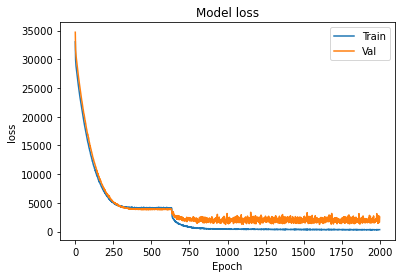

In [64]:
loss_plot(history)

In [65]:
#Test prediction
#use github as example
#read about hyperparameters and explore diff ones
#how will 2 be compared since there's no accuracy

In [66]:
y_test=np.array(y_test)


In [67]:
y_pred = model.predict(X_test)


In [68]:
y_pred

array([[127.79702 ],
       [146.53978 ],
       [112.41413 ],
       [185.28758 ],
       [108.700676],
       [112.57459 ],
       [114.781044],
       [152.46591 ],
       [114.505   ],
       [156.26344 ],
       [170.80762 ],
       [249.13847 ],
       [174.39781 ],
       [152.2542  ],
       [188.75584 ],
       [285.02643 ],
       [227.95195 ],
       [315.11234 ],
       [118.30024 ],
       [195.47893 ],
       [181.69615 ],
       [ 99.14762 ],
       [206.92712 ],
       [147.04137 ],
       [315.1119  ],
       [ 96.91138 ],
       [207.7968  ],
       [154.97098 ],
       [144.57907 ],
       [154.60342 ],
       [ 98.21878 ],
       [221.96599 ],
       [265.4607  ],
       [113.51244 ],
       [315.11426 ],
       [153.87323 ],
       [173.93721 ],
       [256.31552 ],
       [155.09218 ],
       [110.96792 ],
       [105.59893 ],
       [195.73494 ],
       [206.6467  ],
       [256.70367 ],
       [154.98091 ],
       [121.274506],
       [221.77708 ],
       [263.7

In [69]:
#test_date = pd.DataFrame([X_test_date]).T
#type(test_date)

In [70]:
#test_date

In [71]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)


In [72]:
#result_array = result_array.sort_values(by=['Date'])
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

,y_test,y_predicted,Date
0,132.85,127.797020,2015-07-21
1,144.49,146.539780,2017-06-28
2,116.44,112.414131,2015-09-25
3,191.81,185.287582,2019-06-10
4,108.91,108.700676,2016-04-08
...,...,...,...
372,112.02,111.164406,2015-12-17
373,205.53,207.896683,2019-08-02
374,148.82,147.237610,2017-07-17
375,273.61,286.779663,2020-04-22


In [73]:
result_array['Date'] =pd.to_datetime(result_array.Date)


In [74]:
result_array=result_array.sort_values(by='Date')
result_array

,y_test,y_predicted,Date
45,125.72,121.274506,2015-07-15
357,127.74,123.765808,2015-07-16
0,132.85,127.797020,2015-07-21
128,125.32,123.379265,2015-07-24
241,123.38,121.061455,2015-07-28
...,...,...,...
49,319.25,315.110046,2020-05-29
34,344.72,315.114258,2020-06-12
76,351.46,315.090942,2020-06-16
236,365.00,315.011963,2020-06-24


In [75]:
result_array=result_array.reset_index(drop=True, inplace=False)

Text(0.5, 1.0, 'Actual vs Predicted')

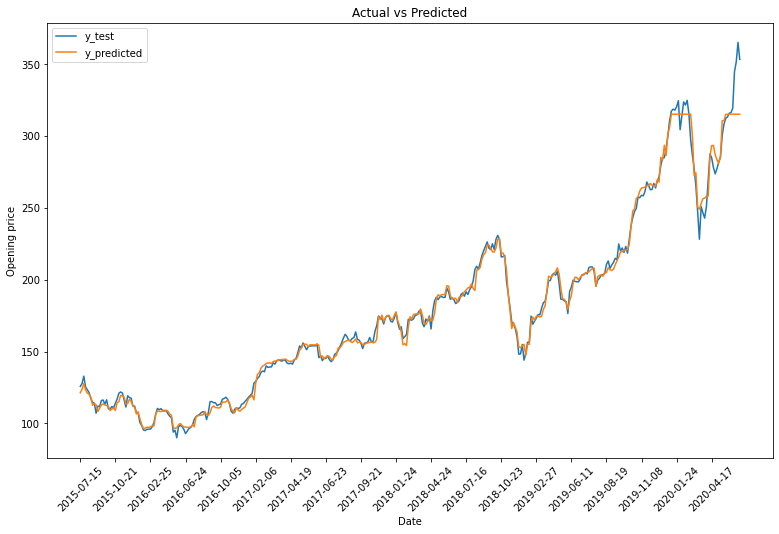

In [76]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Actual vs Predicted')

In [ ]:
X_test